In [110]:
import pandas as pd
import h5py
import networkx
import pickle as pkl
import matplotlib.pyplot as plt


## Read File and Sanity Check

In [82]:
filename = '../data/wos/wos_00_07.h5'
filename2 = '../data/wos/wos_00_07_author.h5'

In [104]:
author_df = pd.read_hdf(filename2)
author_df = author_df.dropna()

In [29]:
author_df.head()

,uid,seq_no,author_id
0,WOS:000086109900003,1,AuthorDAIS10992977
1,WOS:000086109900003,2,AuthorDAIS2217162
2,WOS:000167161300007,1,AuthorDAIS14097041
3,WOS:000167161300007,2,AuthorDAIS13159415
4,WOS:000167161300007,3,AuthorDAIS10385644


In [30]:
paper_df = pd.read_hdf(filename)

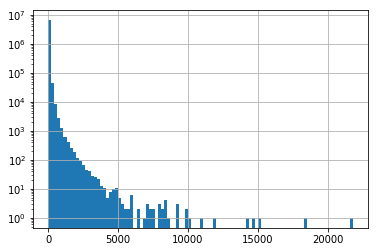

In [61]:
paper_df[paper_df['C10'] > paper_df['C10'].quantile(.1)]['C10'].hist(bins = 100, log = True)

In [51]:
paper_df.sort_values('C10', ascending = False).head()

,uid,year,journal,C10
7463324,WOS:000248848400005,2007,MOLECULAR BIOLOGY AND EVOLUTION,21776
7096944,WOS:000244570700015,2007,NATURE MATERIALS,18498
4375042,WOS:000224756700045,2004,SCIENCE,15071
1505363,WOS:000173949500003,2001,METHODS,14684
6784202,WOS:000251197700021,2007,BIOINFORMATICS,14260


In [80]:
len(paper_df[paper_df['C10'] > paper_df['C10'].quantile(.2)])/len(paper_df)

0.7465886801792984

## Get Paper -> Author Edgelist

In [92]:
author_df[['uid', 'author_id']].head()

,uid,author_id
0,WOS:000086109900003,AuthorDAIS10992977
1,WOS:000086109900003,AuthorDAIS2217162
2,WOS:000167161300007,AuthorDAIS14097041
3,WOS:000167161300007,AuthorDAIS13159415
4,WOS:000167161300007,AuthorDAIS10385644


#### Checking if string formatting holds true

In [93]:
author_df[~author_df['uid'].str.contains('WOS')]

,uid,seq_no,author_id


In [102]:
len(author_df[~ author_df['author_id'].str.startswith('AuthorDAIS')])

8035139

In [105]:
author_df['author_id'] = 'A: ' + author_df['author_id']

## Get Paper -> Venue Edgelist

In [109]:
paper_df[['uid', 'journal']].head()

,uid,journal
0,WOS:000086109900003,J: JOURNAL OF PHYSICS A-MATHEMATICAL AND GENERAL
1,WOS:000167161300007,J: CEMENT AND CONCRETE RESEARCH
2,WOS:000087010000039,J: PERCEPTUAL AND MOTOR SKILLS
3,WOS:000088831900009,J: JOURNAL OF CONTROLLED RELEASE
4,WOS:000089715100005,J: EUROPEAN JOURNAL OF BIOCHEMISTRY


In [108]:
paper_df['journal'] = 'J: ' + paper_df['journal']

## Combining Edgelists

In [121]:
edgelists_df = pd.DataFrame()
edgelists_df = edgelists_df.append(paper_df[['uid', 'journal']])

edgelists_df = edgelists_df.rename(columns = {'uid':'node_0', 'journal':'node_1'})

edgelists_df = edgelists_df.append(author_df[['uid', 'author_id']].rename(columns = {'uid':'node_0', 'author_id':'node_1'}))

In [122]:
nx.from edgelists_df

,node_0,node_1
0,WOS:000086109900003,J: JOURNAL OF PHYSICS A-MATHEMATICAL AND GENERAL
1,WOS:000167161300007,J: CEMENT AND CONCRETE RESEARCH
2,WOS:000087010000039,J: PERCEPTUAL AND MOTOR SKILLS
3,WOS:000088831900009,J: JOURNAL OF CONTROLLED RELEASE
4,WOS:000089715100005,J: EUROPEAN JOURNAL OF BIOCHEMISTRY
...,...,...
30740037,WOS:000250039200003,A: AuthorDAIS13193048
30740038,WOS:000250039200003,"A: RUBILONI, A."
30740039,WOS:000250039200003,"A: CAMPO, P."
30740040,WOS:000250039200003,A: AuthorDAIS16388075
